Global E-Commerce Analysis: Visualizing Customer Behavior and Delivery Patterns

In [1]:
! pip install geopandas matplotlib contextily
! pip install geopandas matplotlib contextily ipywidgets
! pip install scikit-learn
! pip install folium
! pip install networkx
! pip install seaborn

import seaborn as sn
import networkx as nx
import pandas as pd
import geopandas as gpd
import contextily as ctx
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load the datasets
logs = pd.read_csv("tokenized_access_logs.csv")
description = pd.read_csv("DescriptionDataCoSupplyChain.csv")
data = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='latin-1')

# Display the first few rows of each dataset to understand its structure
print("Tokenized Access Logs:")
display(logs.head())

print("\nSupply Chain Description:")
display(description.head())

print("\nSupply Chain Data:")
display(data.head())

Tokenized Access Logs:


,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...



Supply Chain Description:


,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer



Supply Chain Data:


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
# Replace "EE. UU." with "United States of America" in the "Customer Country" column
data['Customer Country'] = data['Customer Country'].replace('EE. UU.', 'United States of America')

# List of columns to drop
unwanted_columns = ['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password','Product Image','Order Zipcode','Product Description','Product Status','Order Item Cardprod Id']

# Drop unwanted columns
data.drop(columns=unwanted_columns, inplace=True)

data.to_csv('modified_data.csv', index=False)

# Display the DataFrame after dropping columns
display(data)


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.750000,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.750000,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.750000,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.750000,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.750000,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,40.000000,Eastern Asia,Shanghái,CLOSED,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,-613.770019,Eastern Asia,Osaka,COMPLETE,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,141.110001,Oceania,Australia del Sur,PENDING,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,1004,45,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/18/2016 20:18,Standard Class


PRE - PROCESSING

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Segment              

In [5]:
data.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id       

ANALYSIS

STORE LOCATIONS

In [10]:
# Create a GeoDataFrame with store locations
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Initialize Folium map
mymap = folium.Map(location=[gdf['Latitude'].mean(), gdf['Longitude'].mean()], zoom_start=5)

# Add markers for each store location
for index, row in gdf.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Address']).add_to(mymap)

# Display the map with store locations
mymap

C:\Users\USER\AppData\Local\Temp\ipykernel_12668\2833894022.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_locations.dropna(inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12668\2833894022.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


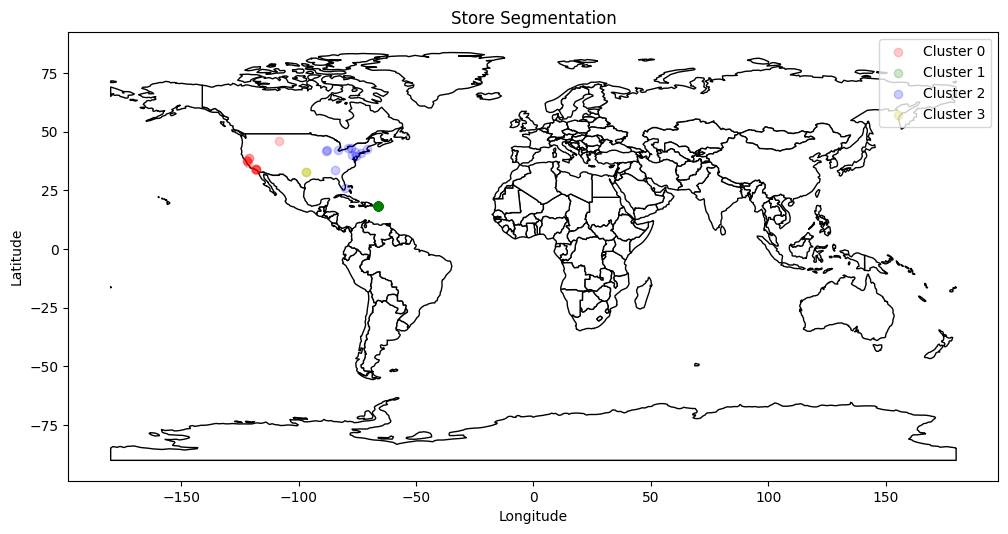

In [13]:
# Load the datasets
customer_data = data
# Assuming latitude and longitude columns are named 'Latitude' and 'Longitude'
customer_locations = customer_data[['Latitude', 'Longitude']]

# Preprocess the data (remove missing values, outliers, etc.)
customer_locations.dropna(inplace=True)

# Perform K-means clustering for geographic segmentation
k = 4 # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(customer_locations)
customer_data['Cluster'] = kmeans.labels_

# Plot customer locations and clusters on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black', figsize=(12, 8))
colors = ['r', 'g', 'b', 'y']  # Define colors for clusters
for cluster, color in zip(range(k), colors):
    cluster_points = customer_data[customer_data['Cluster'] == cluster]
    cluster_points_geo = gpd.GeoDataFrame(cluster_points, geometry=gpd.points_from_xy(cluster_points['Longitude'], cluster_points['Latitude']))
    cluster_points_geo.plot(ax=base, color=color, alpha=0.2, label=f'Cluster {cluster}')
plt.title('Store Segmentation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

CUSTOMER GEOGRAPHICS

In [14]:
# Concatenate Customer State and Customer Zipcode to form the address
data['Address'] = data['Customer State'] + ', ' + data['Customer Zipcode'].astype(str)

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode addresses and get latitude and longitude
def geocode_address(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Geocode addresses and create new columns for latitude and longitude
data['New Latitude'], data['New Longitude'] = zip(*data['Address'].apply(geocode_address))

# Drop rows with missing coordinates
data = data.dropna(subset=['New Latitude', 'New Longitude'])

# Create a Folium map centered at the mean of all customer coordinates
map_center = [data['New Latitude'].mean(), data['New Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)

# Add markers for each customer location
for index, row in data.iterrows():
    folium.Marker([row['New Latitude'], row['New Longitude']], popup=row['Address']).add_to(mymap)

# Analyze customer clusters using K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(data[['New Latitude', 'New Longitude']])
data['Cluster'] = kmeans.labels_

# Display the map with customer locations and clusters
mymap


ROUTE OPTIMIZATION - DIJKSTRA ALGORITHM

In [15]:
store_locations = data[['Latitude', 'Longitude']].values
customer_data = data[['Customer State', 'Customer Zipcode']].head(1)
order_data = data[['Order City', 'Order State', 'Order Country']]

# Step 1: Geocode customer order locations and order recipient locations
geolocator = Nominatim(user_agent="delivery_optimization")

# Function to geocode addresses and get latitude and longitude
def geocode_address(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Geocode customer order locations
customer_order_locations = []
for _, customer in customer_data.iterrows():
    address = f"{customer['Customer State']}, {customer['Customer Zipcode']}"
    lat, lon = geocode_address(address)
    if lat and lon:
        customer_order_locations.append((lat, lon))

# Geocode order recipient locations
order_recipient_locations = []
for _, order in order_data.iterrows():
    address = f"{order['Order City']}, {order['Order State']}, {order['Order Country']}"
    lat, lon = geocode_address(address)
    if lat and lon:
        order_recipient_locations.append((lat, lon))

# Step 2: Calculate distances between locations
def calculate_distance(point1, point2):
    # Calculate distance between two points using Haversine formula
    lat1, lon1 = np.radians(point1)
    lat2, lon2 = np.radians(point2)
    R = 6371  # Radius of the Earth in kilometers
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) * np.sin(dlat / 2) + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) * np.sin(dlon / 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distances between customer order locations and store locations
customer_order_distances = np.zeros((len(customer_order_locations), len(store_locations)))
for i, customer_loc in enumerate(customer_order_locations):
    for j, store_loc in enumerate(store_locations):
        customer_order_distances[i, j] = calculate_distance(customer_loc, store_loc)

# Calculate distances between order recipient locations and store locations
order_recipient_distances = np.zeros((len(order_recipient_locations), len(store_locations)))
for i, order_loc in enumerate(order_recipient_locations):
    for j, store_loc in enumerate(store_locations):
        order_recipient_distances[i, j] = calculate_distance(order_loc, store_loc)

# Step 3: Routing algorithm (Dijkstra's algorithm)
G = nx.Graph()
G.add_nodes_from(range(len(customer_order_locations) + len(order_recipient_locations) + len(store_locations)))

# Add edges between customer order locations, order recipient locations, and store locations
for i in range(len(customer_order_locations)):
    for j in range(len(store_locations)):
        G.add_edge(i, len(customer_order_locations) + len(order_recipient_locations) + j,
                   weight=customer_order_distances[i, j])

for i in range(len(order_recipient_locations)):
    for j in range(len(store_locations)):
        G.add_edge(len(customer_order_locations) + i, len(customer_order_locations) + j,
                   weight=order_recipient_distances[i, j])

# Calculate shortest paths from each customer order location to store locations
shortest_paths = {}
for i in range(len(customer_order_locations)):
    shortest_paths[i] = {}
    for j in range(len(store_locations)):
        shortest_path = nx.dijkstra_path(G, i, len(customer_order_locations) + len(order_recipient_locations) + j)
        shortest_distance = nx.dijkstra_path_length(G, i, len(customer_order_locations) + len(order_recipient_locations) + j)
        shortest_paths[i][j] = {'path': shortest_path, 'distance': shortest_distance}

# Step 4: Analyze shipping costs and delivery times (example)
shipping_modes = ['Ground', 'Air']
shipping_costs = {'Ground': 10, 'Air': 50}  # Example shipping costs in dollars per kilometer
delivery_times = {'Ground': 2, 'Air': 0.5}   # Example delivery times in days

# Consider customer preferences and cost-effectiveness
for customer_idx, paths in shortest_paths.items():
    best_shipping_mode = None
    min_cost = float('inf')
    min_delivery_time = float('inf')
    for mode in shipping_modes:
        total_cost = 0
        total_delivery_time = 0
        for store_idx, path_info in paths.items():
            total_cost += path_info['distance'] * shipping_costs[mode]
            total_delivery_time += delivery_times[mode]
        if total_cost < min_cost or (total_cost == min_cost and total_delivery_time < min_delivery_time):
            min_cost = total_cost
            min_delivery_time = total_delivery_time
            best_shipping_mode = mode
    print(f"Customer {customer_idx}: Best shipping mode - {best_shipping_mode}, Cost - ${min_cost:.2f}, Delivery Time - {min_delivery_time} days")

Customer 0: Best shipping mode - Ground, Cost - $5809082.74, Delivery Time - 200 days


ORDER DELIVERY LOCATIONS

In [18]:
# Concatenate Order City, Order State, and Order Country to form the address
data['Address'] = data['Order City'] + ', ' + data['Order State'] + ', ' + data['Order Country']

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode addresses and get latitude and longitude
def geocode_address(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Geocode addresses and create new columns for latitude and longitude
data['Latitude'], data['Longitude'] = zip(*data['Address'].apply(geocode_address))

# Drop rows with missing coordinates
data = data.dropna(subset=['Latitude', 'Longitude'])

# Create a Folium map centered at the mean of all order coordinates
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
mymap2 = folium.Map(location=map_center, zoom_start=5)

# Add markers for each order location
for index, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Address']).add_to(mymap2)

# Display the map with order locations
mymap2.save("order_locations.html")

mymap2


Product Category v/s Customer Country

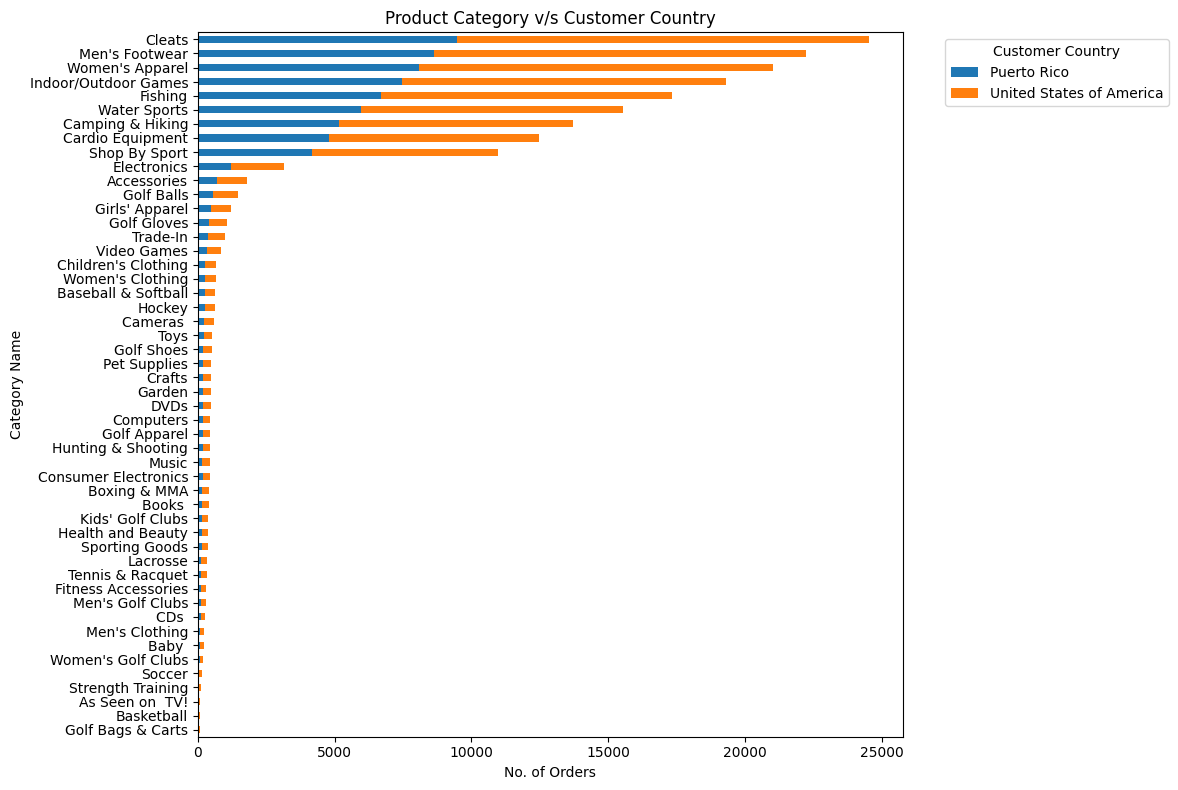

In [46]:
# Replace "EE. UU." with "United States of America" in the "Customer Country" column
data['Customer Country'] = data['Customer Country'].replace('EE. UU.', 'United States of America')

# Group the data by 'Category Name' and 'Customer Country' and count the rows
grouped_data = data.groupby(['Category Name', 'Customer Country']).size().reset_index(name='Count')

# Pivot the data to have 'Category Name' as rows and 'Customer Country' as columns
pivot_data = grouped_data.pivot(index='Category Name', columns='Customer Country', values='Count').fillna(0)

# Calculate the total count for each category
pivot_data['Total'] = pivot_data.sum(axis=1)

# Sort the categories based on the total count in ascending order
pivot_data = pivot_data.sort_values(by='Total')

# Remove the 'Total' column
pivot_data = pivot_data.drop(columns='Total')

# Plotting
pivot_data.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Product Category v/s Customer Country')
plt.xlabel('No. of Orders')
plt.ylabel('Category Name')
plt.legend(title='Customer Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Order region vs Order status

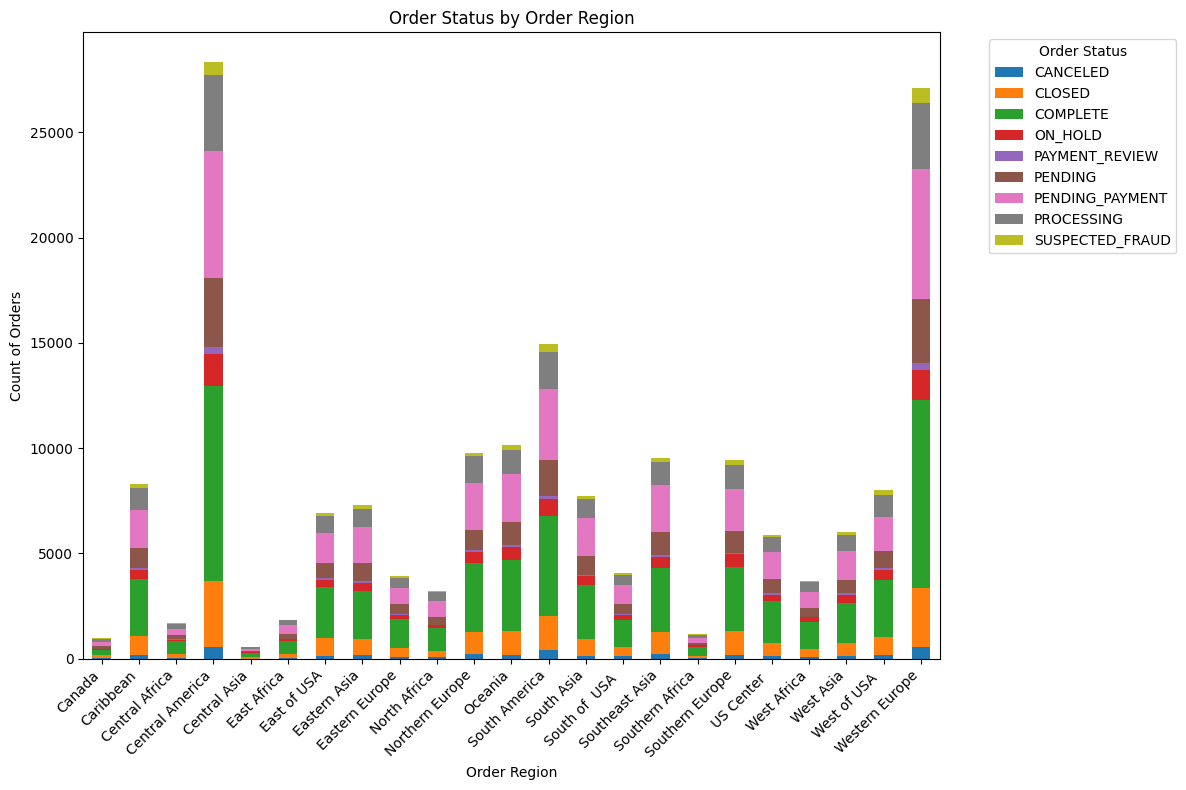

In [47]:
# Group the data by 'Order Region' and 'Order Status' and count the rows
grouped_data = data.groupby(['Order Region', 'Order Status']).size().reset_index(name='Count')

# Pivot the data to have 'Order Status' as columns and 'Order Region' as rows
pivot_data = grouped_data.pivot(index='Order Region', columns='Order Status', values='Count').fillna(0)

# Plotting
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Order Status by Order Region')
plt.xlabel('Order Region')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Order region v/s. Order Status

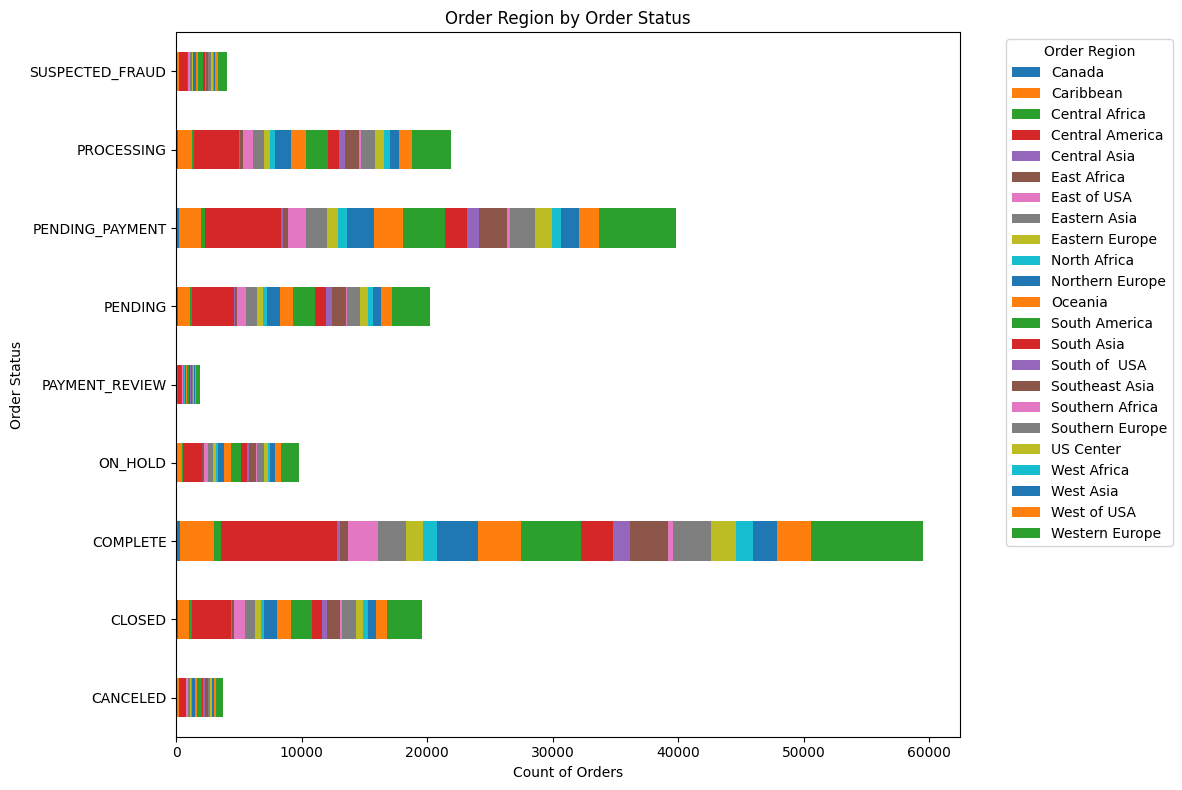

In [48]:
# Group the data by 'Order Status' and 'Order Region' and count the rows
grouped_data = data.groupby(['Order Status', 'Order Region']).size().unstack(fill_value=0)

# Plotting
grouped_data.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Order Region by Order Status')
plt.xlabel('Count of Orders')
plt.ylabel('Order Status')
plt.legend(title='Order Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


SUSPECTED FRAUD ORDERS

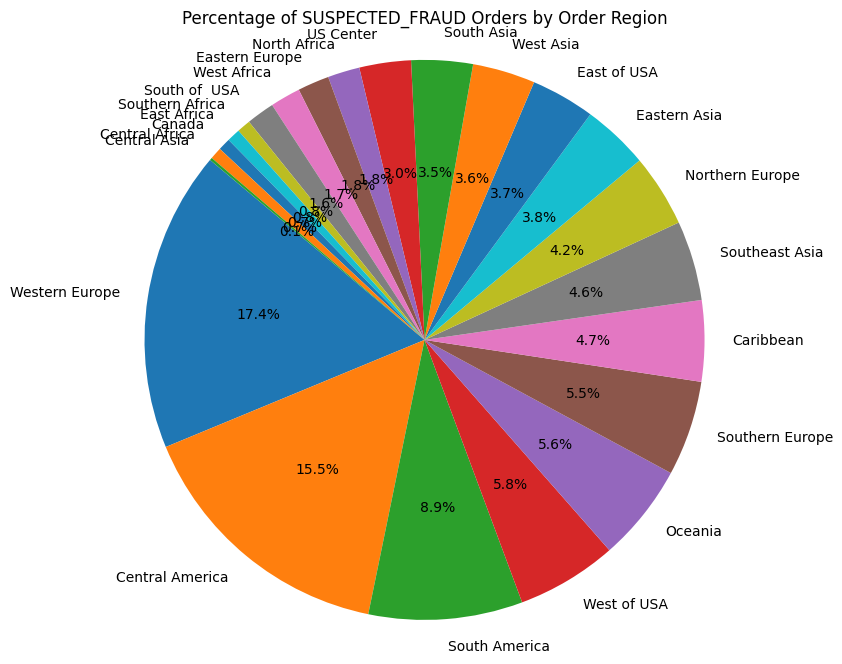

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to include only 'SUSPECTED_FRAUD' order status
fraud_data = data[data['Order Status'] == 'SUSPECTED_FRAUD']

# Group the filtered data by 'Order Region' and count the rows
grouped_data = fraud_data['Order Region'].value_counts()

# Calculate percentages
fraud_percentages = (grouped_data / grouped_data.sum()) * 100

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(fraud_percentages, labels=fraud_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of SUSPECTED_FRAUD Orders by Order Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Customer segments by Customer country

<Figure size 1000x600 with 0 Axes>

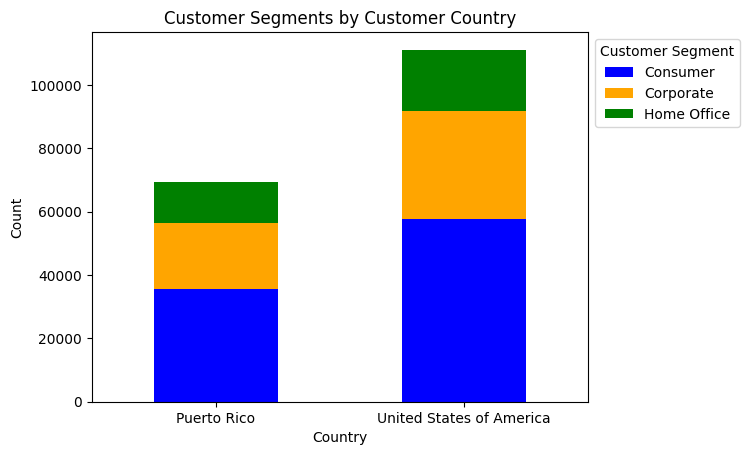

In [8]:
# Group the data by 'Customer Country' and 'Customer Segment' and count the rows
grouped_data = data.groupby(['Customer Country', 'Customer Segment']).size().unstack(fill_value=0)

# Define a color map with a color for each segment type
colors = {'Consumer': 'blue', 'Corporate': 'orange', 'Home Office': 'green'}

# Plot the data
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, color=[colors.get(x, 'gray') for x in grouped_data.columns])

plt.title('Customer Segments by Customer Country')
plt.xlabel('Country')
plt.xticks(rotation=0, ha='center')
plt.ylabel('Count')
plt.legend(title='Customer Segment', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


Customer segments by Order country

<Figure size 1500x800 with 0 Axes>

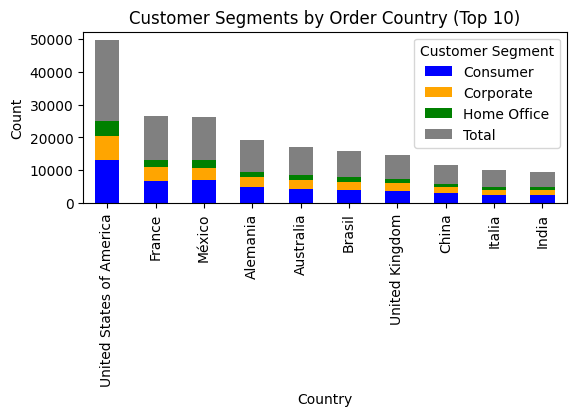

In [36]:
# Replace "Estados Unidos" with "United States of America" in the "Customer Country" column
data['Order Country'] = data['Order Country'].replace('Estados Unidos', 'United States of America')

# Replace "Francia" with "France" in the "Customer Country" column
data['Order Country'] = data['Order Country'].replace('Francia', 'France')

# Replace "Reino Unido" with "United Kingdom" in the "Customer Country" column
data['Order Country'] = data['Order Country'].replace('Reino Unido', 'United Kingdom')

# Group the data by 'Order Country' and 'Customer Segment' and count the rows
grouped_data = data.groupby(['Order Country', 'Customer Segment']).size().unstack(fill_value=0)

# Sum the counts across all customer segments to get total count per country
grouped_data['Total'] = grouped_data.sum(axis=1)

# Sort the countries by total count in descending order and select the top 10
top_10_countries = grouped_data['Total'].sort_values(ascending=False).head(10).index

# Filter the grouped data to include only the top 10 countries
grouped_data = grouped_data.loc[top_10_countries]

# Define a color map with a color for each segment type
colors = {'Consumer': 'blue', 'Corporate': 'orange', 'Home Office': 'green'}

# Plot the data
plt.figure(figsize=(15, 8))
grouped_data.plot(kind='bar', stacked=True, color=[colors.get(x, 'gray') for x in grouped_data.columns])

plt.title('Customer Segments by Order Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Customer Segment', bbox_to_anchor=(1, 1))

# Adjust layout to increase space for x-axis labels
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()


Top 5 products in each country

In [37]:
# Group the data by 'Customer Country' and 'Product Name' and count the rows
grouped_data = data.groupby(['Customer Country', 'Product Name']).size().unstack(fill_value=0)

# Find the top 5 products for each country
top_products_by_country = {}
for country in grouped_data.index:
    top_products_by_country[country] = grouped_data.loc[country].nlargest(5).index.tolist()

# Display the top 5 products for each country
for country, top_products in top_products_by_country.items():
    print(f"Top 5 products in {country}:")
    for rank, product in enumerate(top_products, 1):
        print(f"{rank}. {product}")
    print()

Top 5 products in Puerto Rico:
1. Perfect Fitness Perfect Rip Deck
2. Nike Men's CJ Elite 2 TD Football Cleat
3. Nike Men's Dri-FIT Victory Golf Polo
4. O'Brien Men's Neoprene Life Vest
5. Field & Stream Sportsman 16 Gun Fire Safe

Top 5 products in United States of America:
1. Perfect Fitness Perfect Rip Deck
2. Nike Men's CJ Elite 2 TD Football Cleat
3. Nike Men's Dri-FIT Victory Golf Polo
4. O'Brien Men's Neoprene Life Vest
5. Field & Stream Sportsman 16 Gun Fire Safe



Market share by region , Market share by Order region

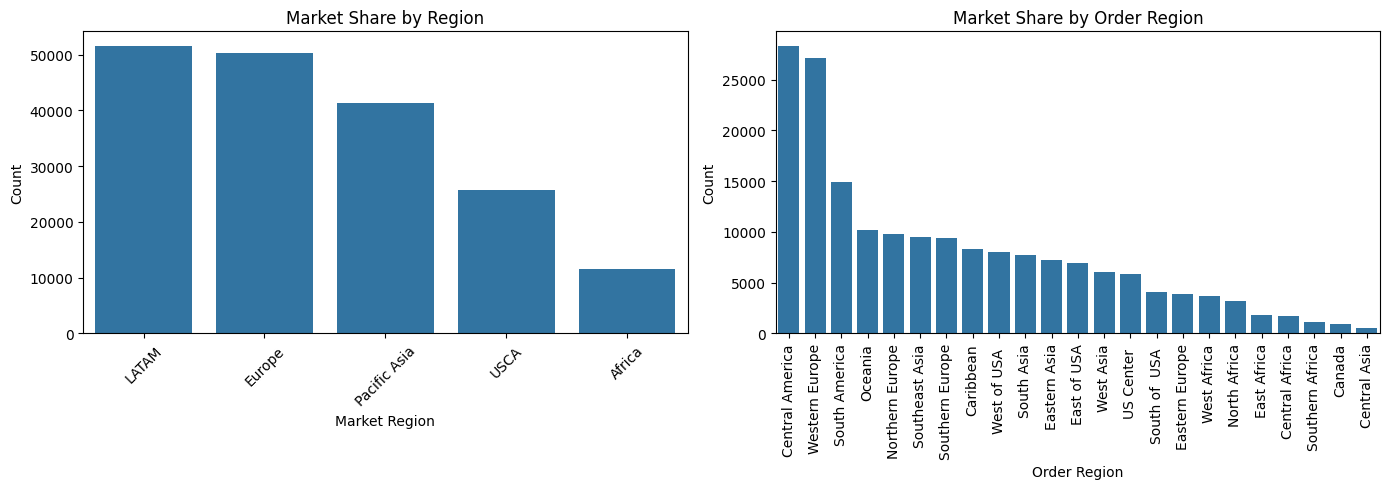

In [38]:
market_share = data['Market'].value_counts()
order_region_share = data['Order Region'].value_counts()

plt.figure(figsize=(14,5))  # Adjust the figure size if needed

# First subplot
plt.subplot(1, 2, 1)
sn.barplot(x=market_share.index, y=market_share.values)
plt.title('Market Share by Region')
plt.xlabel('Market Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Second subplot
plt.subplot(1, 2, 2)
sn.barplot(x=order_region_share.index, y=order_region_share.values)
plt.title('Market Share by Order Region')
plt.xlabel('Order Region')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Adjust layout to prevent clipping of titles
plt.tight_layout()

plt.show()

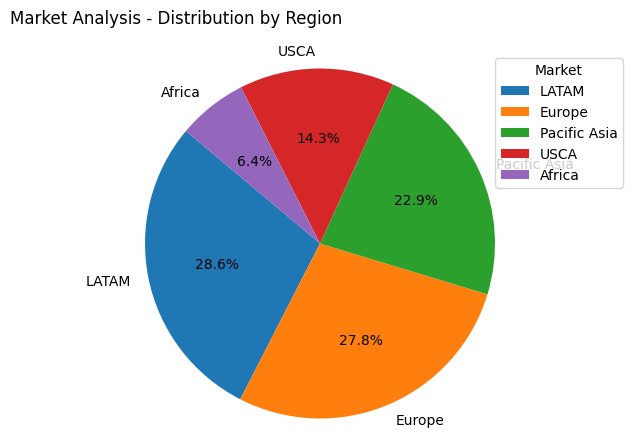

In [39]:
plt.figure(figsize= (8,5))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Analysis - Distribution by Region', loc='left', pad=20)
plt.axis('equal')
plt.legend(market_share.index, title='Market', loc='best')
plt.show()

Shipping mode v/s Customer country

<Figure size 1500x800 with 0 Axes>

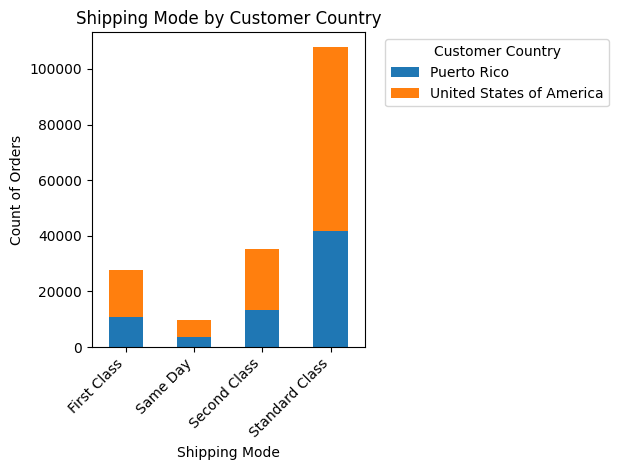

In [40]:
# Group the data by 'Shipping Mode' and 'Customer Country' and count the rows
grouped_data = data.groupby(['Shipping Mode', 'Customer Country']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15, 8))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Shipping Mode by Customer Country')
plt.xlabel('Shipping Mode')
plt.ylabel('Count of Orders')
plt.legend(title='Customer Country', bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 countries by highest sales

Text(0.5, 1.0, 'Top 10 Countries by highest sales')

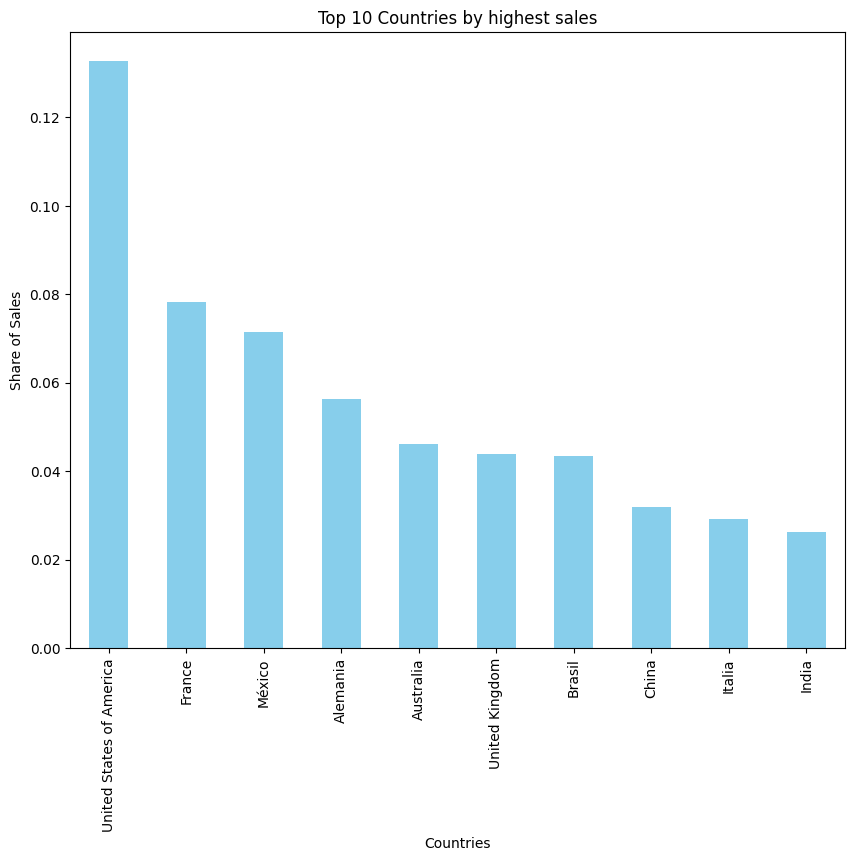

In [41]:
total_sales = data['Sales'].sum()
total_profit = data['Order Profit Per Order'].sum()
# pd.set_option('display.float_format', '${:,.2f}'.format)
total_sales,total_profit

sum_sales_country = data.groupby('Order Country')[['Sales','Order Profit Per Order']].sum().sort_values('Sales',ascending=False)
pd.set_option('display.float_format', '${:,.2f}'.format)
sum_sales_country.rename(columns={'Order Profit Per Order': 'Profit'}, inplace=True)
sum_sales_country.head(8)

sum_sales_country["% Sales"] = (sum_sales_country['Sales']/total_sales)
plt.figure(figsize=(10,8))
sum_sales_country['% Sales'].head(10).plot(kind='bar', color='skyblue')

plt.xlabel('Countries')
plt.ylabel('Share of Sales')
plt.title('Top 10 Countries by highest sales')

Sales Focus area

In [43]:
sum_sales_country.head(10)

,Sales,Profit,% Sales
Order Country,,,
United States of America,"$4,879,667.67","$540,413.07",$0.13
France,"$2,879,942.36","$327,828.58",$0.08
México,"$2,633,195.29","$303,278.37",$0.07
Alemania,"$2,074,171.82","$194,827.08",$0.06
Australia,"$1,694,621.67","$170,041.58",$0.05
United Kingdom,"$1,612,094.85","$180,942.88",$0.04
Brasil,"$1,594,319.95","$186,713.64",$0.04
China,"$1,172,902.11","$122,190.92",$0.03
Italia,"$1,072,181.67","$121,545.47",$0.03


In [44]:
sum_sales_market = data.groupby('Market')[['Sales','Order Profit Per Order']].sum().sort_values('Sales',ascending=False)
pd.set_option('display.float_format', '${:,.2f}'.format)
sum_sales_market['Sales']

Market
Europe         $10,872,396.80
LATAM          $10,277,612.84
Pacific Asia    $8,273,743.74
USCA            $5,066,528.71
Africa          $2,294,452.93
Name: Sales, dtype: float64

Correlation Analysis

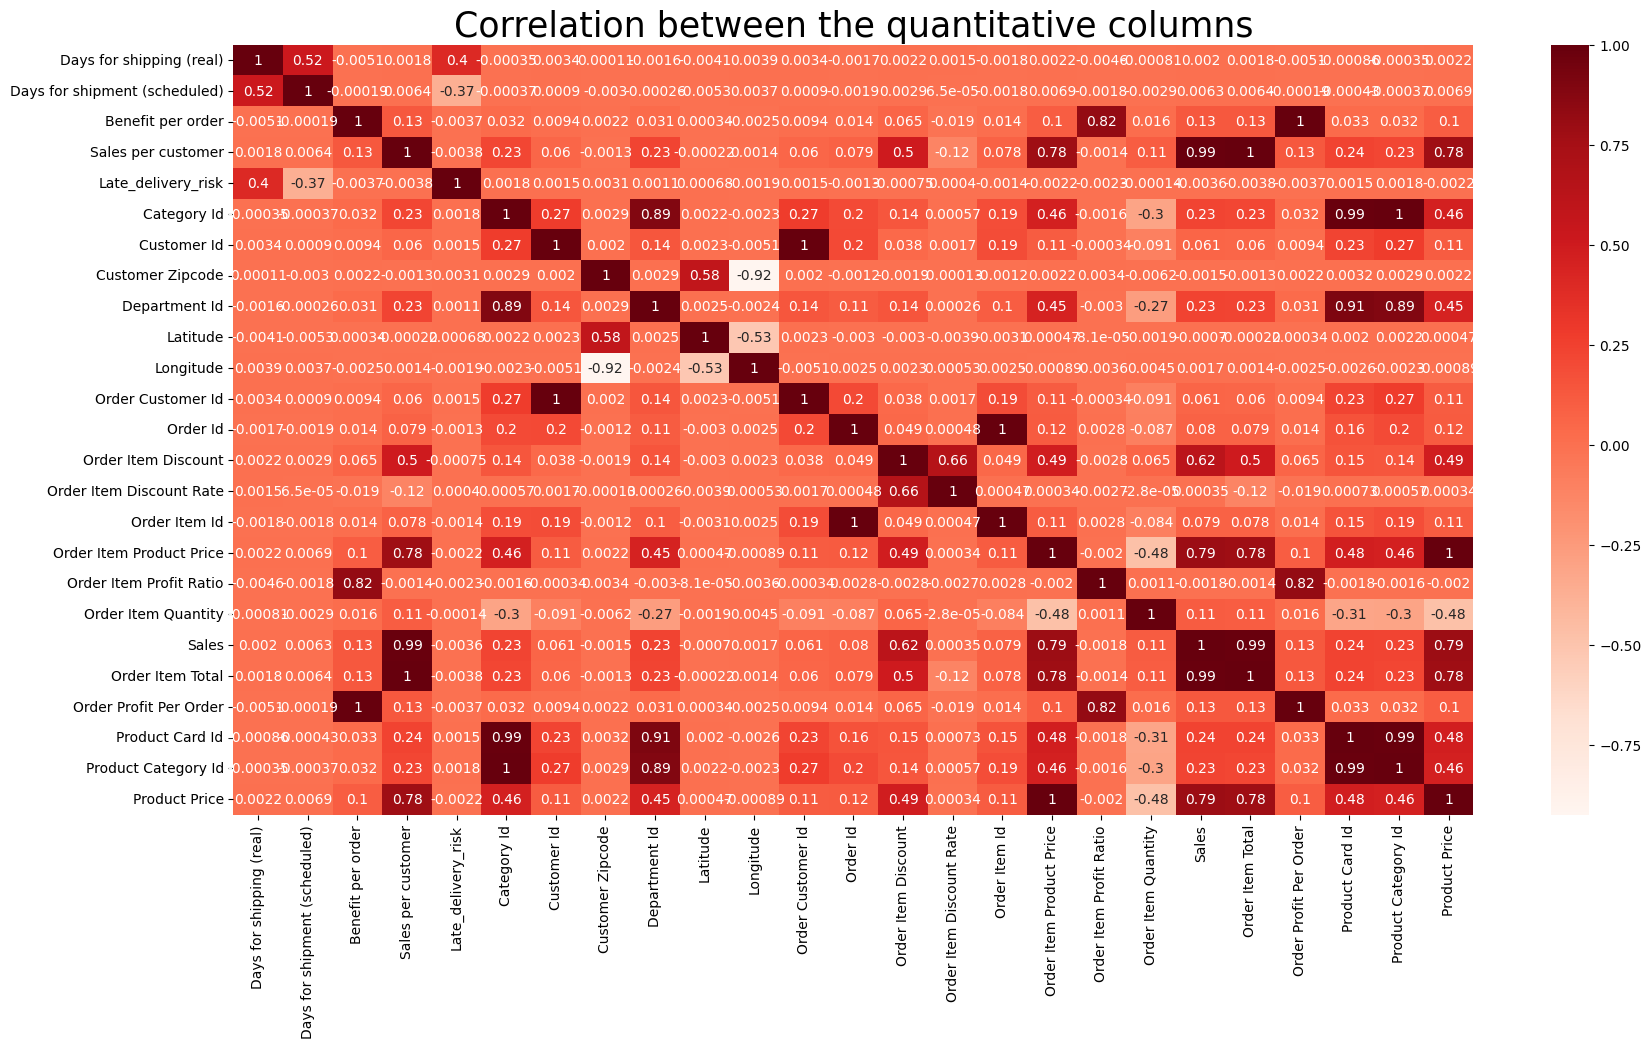

In [46]:
data_numbers = data.select_dtypes(include=['number'])

plt.rcParams["figure.figsize"] = 20,10
sn.heatmap(data_numbers.corr(),cmap='Reds',annot= True)
plt.title("Correlation between the quantitative columns",size = 25);

Delivery Status vs Country

<Figure size 1200x800 with 0 Axes>

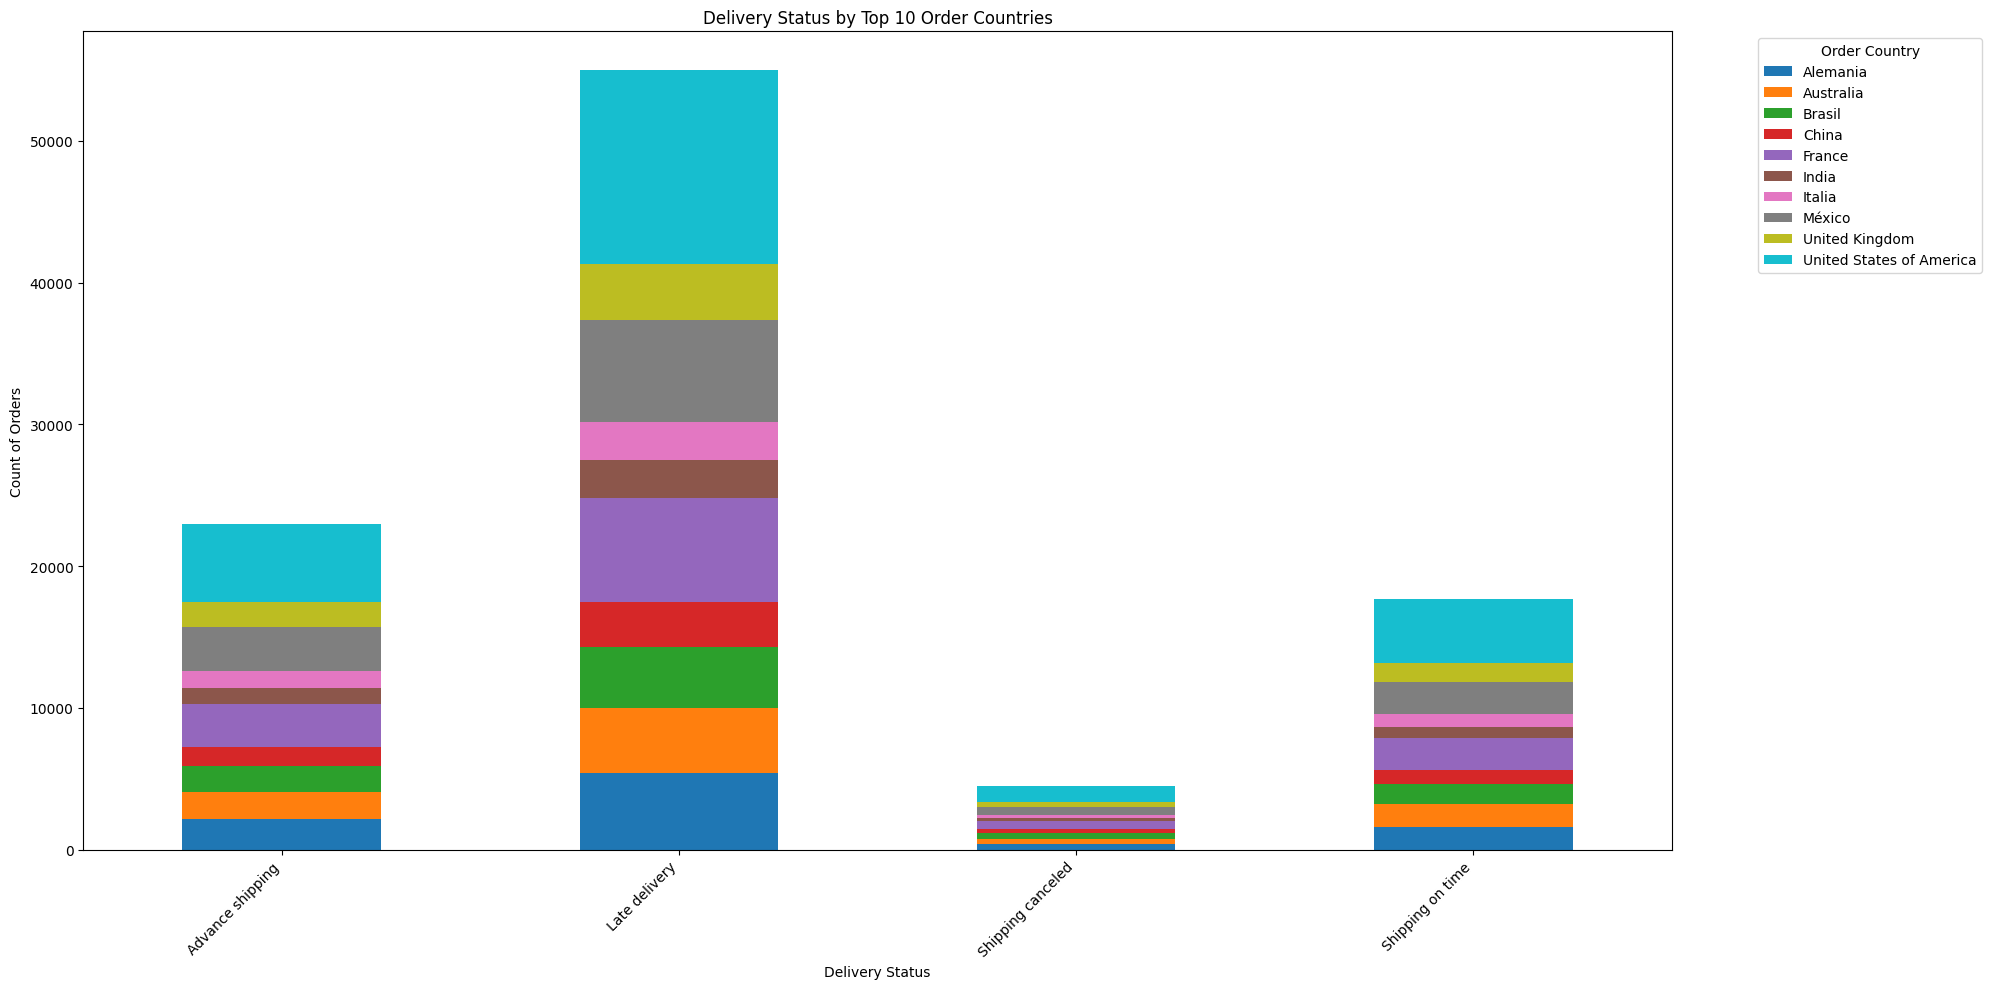

In [48]:
# Calculate the count of orders for each order country
order_counts = data['Order Country'].value_counts()

# Select the top 10 order countries
top_10_countries = order_counts.head(10).index

# Filter the data to include only the top 10 countries
filtered_data = data[data['Order Country'].isin(top_10_countries)]

# Group the filtered data by 'Delivery Status' and 'Order Country' and count the rows
grouped_data = filtered_data.groupby(['Delivery Status', 'Order Country']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Delivery Status by Top 10 Order Countries')
plt.xlabel('Delivery Status')
plt.ylabel('Count of Orders')
plt.legend(title='Order Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()